<a href="https://colab.research.google.com/github/mborowik/zajecia/blob/main/bk_ml_klasyfikacja_25_02_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/matzim95/ML-datasets

Cloning into 'ML-datasets'...
remote: Enumerating objects: 194, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 194 (delta 33), reused 124 (delta 24), pack-reused 60
Receiving objects: 100% (194/194), 35.45 MiB | 11.08 MiB/s, done.
Resolving deltas: 100% (45/45), done.
Updating files: 100% (127/127), done.


In [2]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
diabetes=pd.read_csv('ML-datasets/diabetes.csv')

In [4]:
diabetes.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,positive
1,1,85,66,29,0,26.6,0.351,31,negative
2,8,183,64,0,0,23.3,0.672,32,positive
3,1,89,66,23,94,28.1,0.167,21,negative
4,0,137,40,35,168,43.1,2.288,33,positive


In [5]:
diabetes['Class']=diabetes['Class'].astype('category').cat.codes

In [6]:
diabetes.isnull().sum()

Number of times pregnant        0
Plasma glucose concentration    0
Diastolic blood pressure        0
Triceps skin fold thickness     0
2-Hour serum insulin            0
Body mass index                 0
Diabetes pedigree function      0
Age                             0
Class                           0
dtype: int64

In [7]:
X=diabetes.loc[:, diabetes.columns!='Class']

In [8]:
X.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [9]:
y=diabetes['Class']

In [10]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=123)

# Bagging

In [11]:
bagging_model=BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=150, random_state=123)

In [12]:
bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=150,
                  random_state=123)

In [13]:
y_bagg_train=bagging_model.predict(X_train)
y_bagg_test=bagging_model.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, accuracy_score

In [15]:
accuracy_score(y_train, y_bagg_train)

1.0

In [16]:
accuracy_score(y_test, y_bagg_test)

0.7727272727272727

In [17]:
print(classification_report(y_test, y_bagg_test))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        96
           1       0.69      0.72      0.71        58

    accuracy                           0.77       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.77      0.77       154



In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf_model=RandomForestClassifier(n_estimators=150, random_state=123)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=123)

In [20]:
y_rf_train=rf_model.predict(X_train)
y_rf_test=rf_model.predict(X_test)

In [21]:
accuracy_score(y_train, y_rf_train)

1.0

In [22]:
accuracy_score(y_test, y_rf_test)

0.7662337662337663

In [23]:
print(classification_report(y_test, y_rf_test))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        96
           1       0.71      0.64      0.67        58

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.76      0.77      0.76       154



# Boosting

In [24]:
from sklearn.ensemble import AdaBoostClassifier

In [25]:
adaboost_model=AdaBoostClassifier(n_estimators=30)
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=30)

In [26]:
y_ada_train=adaboost_model.predict(X_train)
y_ada_test=adaboost_model.predict(X_test)

In [27]:
accuracy_score(y_train, y_ada_train)

0.8078175895765473

In [28]:
accuracy_score(y_test, y_ada_test)

0.7402597402597403

In [29]:
print(classification_report(y_test, y_ada_test))

              precision    recall  f1-score   support

           0       0.77      0.82      0.80        96
           1       0.67      0.60      0.64        58

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.74      0.74       154



In [30]:
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
grad_model=GradientBoostingClassifier(n_estimators=100, random_state=123)
grad_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=123)

In [32]:
y_grad_train=grad_model.predict(X_train)
y_grad_test=grad_model.predict(X_test)

In [33]:
accuracy_score(y_train, y_grad_train)

0.9218241042345277

In [34]:
accuracy_score(y_test, y_grad_test)

0.8051948051948052

In [35]:
print(classification_report(y_test, y_grad_test))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        96
           1       0.73      0.76      0.75        58

    accuracy                           0.81       154
   macro avg       0.79      0.80      0.79       154
weighted avg       0.81      0.81      0.81       154



In [36]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [37]:
fpr_bag, tpr_bag, thresh_bag=roc_curve(y_test, y_bagg_test)
fpr_rf, tpr_rf, thresh_rf=roc_curve(y_test, y_rf_test)
fpr_ada, tpr_ada, thresh_ada=roc_curve(y_test, y_ada_test)
fpr_grad, tpr_grad, thresh_grad=roc_curve(y_test, y_grad_test)

In [38]:
help_prob=[0 for _ in range(len(y_test))]
help_fpr, help_tpr, _=roc_curve(y_test, help_prob)

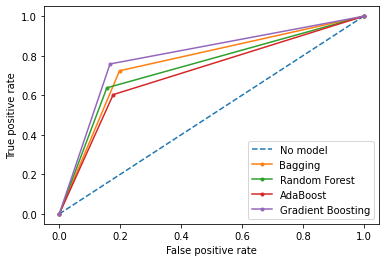

In [39]:
plt.plot(help_fpr, help_tpr, linestyle='--', label='No model')
plt.plot(fpr_bag, tpr_bag, marker='.', label='Bagging')
plt.plot(fpr_rf, tpr_rf, marker='.', label='Random Forest')
plt.plot(fpr_ada, tpr_ada, marker='.', label='AdaBoost')
plt.plot(fpr_grad, tpr_grad, marker='.', label='Gradient Boosting')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

In [40]:
import pickle 
filename='final_model.pkl'
pickle.dump(grad_model, open(filename, 'wb'))

In [41]:
loaded_model=pickle.load(open(filename, 'rb'))

In [42]:
loaded_model.predict(X_test)

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0],
      dtype=int8)

In [43]:
import joblib

In [44]:
filename2="gradient_model.pkl"
joblib.dump(grad_model, filename2)

['gradient_model.pkl']

In [45]:
loaded_model2=joblib.load(filename2)